## Random Forest Classifier:

Using a combination of governance characteristics and organizational characteristics (revenue, assets, ect.) I will predict salary using a Random Forest Classifier model.

In [1356]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize
from scipy import stats
from scipy.special import boxcox, inv_boxcox
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from numpy import interp

## IMPORT DATA

In [1380]:
# import modeling dataset
features = pd.get_dummies(pd.read_csv('02.data/model_dataset_features_eng.csv'))

y = pd.read_csv('02.data/target_categories.csv', header=None, squeeze=True)

In [1382]:
X = features.drop(['reportable_comp'], axis=1)

In [1383]:
# verify the size of target and
# feature datasets are the same
X.shape[0] == y.shape[0]

True

In [1384]:
X.head()

,pca_voting_members,pca_1_financial,pca_2_financial,pca_3_financial,pca_states_pos_1,pca_states_pos_2,formation_yr,state_median_income,volunteer_tot_ct,fundraiseservfee_expense_tot_curyr,ceo_comp_review,officer_comp_review,count_of_controls,cluster_label,subsection_501(c)(3),subsection_501(c)(6),subsection_501(c)(5),subsection_501(c)(14),subsection_501(c)(12),subsection_501(c)(7),subsection_501(c)(4),pca_states_neg,"ntee_categories_Arts, Culture, and Humanities",ntee_categories_Education,ntee_categories_Environment and Animals,ntee_categories_Health,ntee_categories_Human Services,"ntee_categories_International, Foreign Affairs",ntee_categories_Mutual/Membership Benefit,"ntee_categories_Public, Societal Benefit",ntee_categories_Religion Related,"ntee_categories_Unknown, Unclassified"
0,74.050274,-5.527776e+07,-3.918283e+06,738235.289613,-0.085261,-0.082864,1995,56277,0,0,False,False,7,181,False,True,False,False,False,False,False,-0.113183,0,0,0,0,0,0,0,1,0,0
1,-9.388241,-5.667325e+07,-4.918970e+06,476767.290276,-0.085261,-0.082864,1911,56277,100,0,True,True,10,15,False,True,False,False,False,False,False,-0.113183,0,0,0,0,0,0,0,1,0,0
2,-13.630878,-5.478555e+07,-5.736465e+06,-127727.735835,-0.085261,-0.082864,1896,56277,50,0,True,True,8,62,True,False,False,False,False,False,False,-0.113183,1,0,0,0,0,0,0,0,0,0
3,-10.802453,-5.715386e+07,-5.385867e+06,486924.480789,-0.085261,-0.082864,1927,56277,4,0,True,True,9,59,False,True,False,False,False,False,False,-0.113183,0,0,0,0,0,0,0,1,0,0
4,6.168092,-5.572920e+07,-4.700920e+06,459611.580130,-0.085261,-0.082864,1952,56277,145,0,True,True,12,180,False,True,False,False,False,False,False,-0.113183,0,0,0,0,0,0,0,1,0,0


## RANDOM FOREST CLASSIFIER
<a id='random_forest'></a>

In [1385]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [1386]:
rfc = ensemble.RandomForestClassifier()

cross_val_score(rfc, X, y, cv=5)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:2

array([0.20624715, 0.18212745, 0.20296229, 0.16983402, 0.21317122])

In [1387]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1388]:
rfc.score(X_train, y_train)

0.7095810557105664

In [1389]:
rfc.score(X_test, y_test)

0.2364021076214579

In [1367]:
cross_val_predict(rfc, X_test, y_test, cv=2)

array([5, 9, 6, ..., 5, 5, 3], dtype=int64)

In [1390]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(y_test, rfc.predict(X_test)) / \
confusion_matrix(y_test, rfc.predict(X_test)).sum(axis=1, keepdims=True)

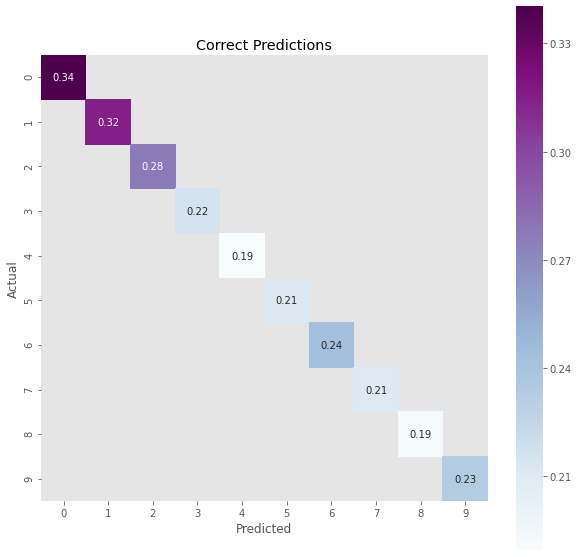

In [1391]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(np.where(np.diagflat(np.diagonal(norm_conf_matrix))
            ==0, np.nan, np.diagflat(np.diagonal(norm_conf_matrix))),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Correct Predictions');

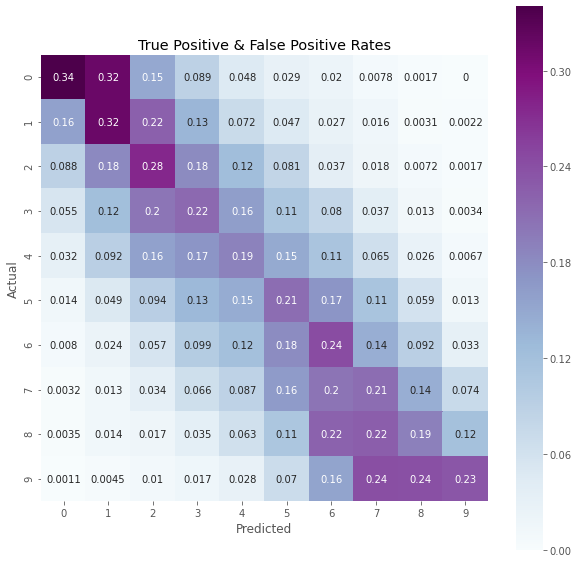

In [1392]:
# compare correct and incorrect predictions
plt.figure(figsize=(10, 10))
# np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=True, 
                 cmap='BuPu')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('True Positive & False Positive Rates');

In [1393]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

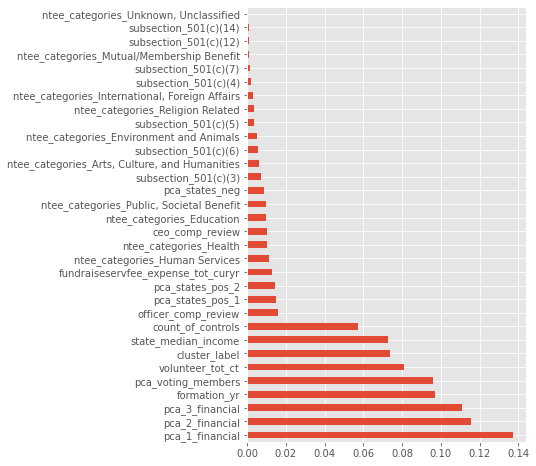

In [1394]:
f_importances.plot(kind='barh', figsize=(5, 8));

In [1395]:
f_importances[f_importances > .04].index

Index(['pca_1_financial', 'pca_2_financial', 'pca_3_financial', 'formation_yr',
       'pca_voting_members', 'volunteer_tot_ct', 'cluster_label',
       'state_median_income', 'count_of_controls'],
      dtype='object')

### Random Forest Classifier 2nd Iteration - selecting only the top features

In [1396]:
X_train, X_test, y_train, y_test = train_test_split(X[f_importances[f_importances > .04].index]
                                                    , y, test_size = 0.2)

In [1397]:
rfc = ensemble.RandomForestClassifier()

# cross_val_score(rfc, X, y, cv=5)

In [1398]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [1399]:
rfc.score(X_train, y_train)

0.7094669584789802

In [1400]:
rfc.score(X_test, y_test)

0.232917064265859

In [1401]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(y_test, rfc.predict(X_test)) / \
confusion_matrix(y_test, rfc.predict(X_test)).sum(axis=1, keepdims=True)

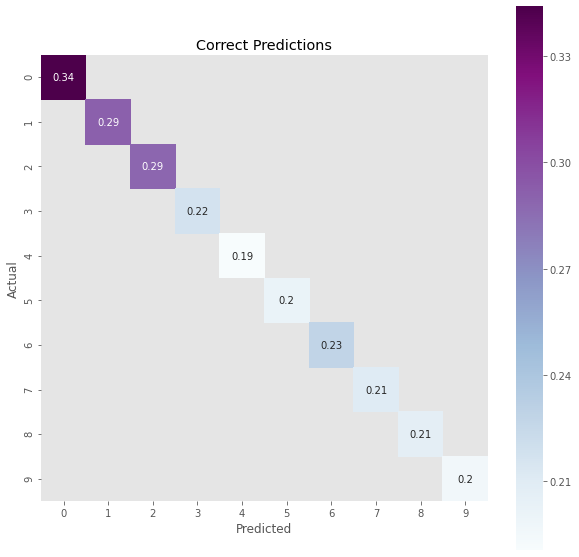

In [1402]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(np.where(np.diagflat(np.diagonal(norm_conf_matrix))
            ==0, np.nan, np.diagflat(np.diagonal(norm_conf_matrix))),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Correct Predictions');

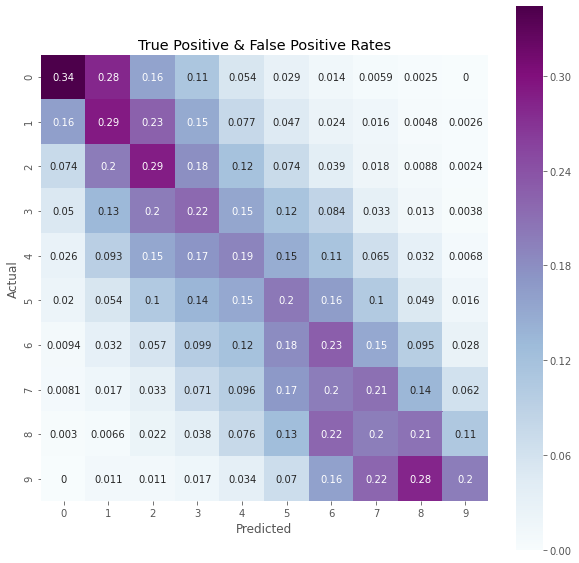

In [1403]:
# compare correct and incorrect predictions
plt.figure(figsize=(10, 10))
# np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=True, 
                 cmap='BuPu')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('True Positive & False Positive Rates');

In [1404]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

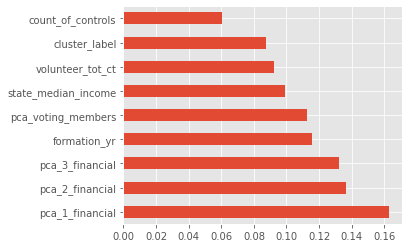

In [1405]:
f_importances.plot(kind='barh', figsize=(5, 4));

### Parameter Tuning

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'log2'],
    'max_depth' : [4,10,20,50],
    'criterion' : ['gini', 'entropy'],
    'warm_start': [True]
}

cv_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3)
cv_rfc.fit(X_train, y_train)

In [ ]:
cv_rfc.best_params_

### Examining classification results as they relate to informing decisions.

In [1309]:
rfc.predict(X_test)

array([2, 9, 7, ..., 2, 4, 1], dtype=int64)

In [1328]:
# examine probability of assignment
# in the test set
pd.DataFrame(rfc.predict_proba(X_test))

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.294524,0.317857,0.000000,0.178333,0.000000,0.000000,0.209286,0.000000,0.000000
1,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.059885,0.314267,0.625849
2,0.0,0.000000,0.000000,0.000000,0.020000,0.028571,0.062857,0.888571,0.000000,0.000000
3,0.0,0.000000,0.228254,0.000000,0.208254,0.273492,0.000000,0.290000,0.000000,0.000000
4,0.0,0.000000,0.000000,0.191645,0.566948,0.093810,0.000000,0.147597,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
22766,0.0,0.326667,0.100000,0.423333,0.050000,0.000000,0.066667,0.033333,0.000000,0.000000
22767,0.0,0.066667,0.600000,0.233333,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
22768,0.1,0.133333,0.316667,0.100000,0.200000,0.100000,0.050000,0.000000,0.000000,0.000000
22769,0.0,0.050000,0.000000,0.033333,0.650000,0.066667,0.075000,0.050000,0.075000,0.000000


Some observations have probabilites clustered in adjacent categories, while others are all over the place.

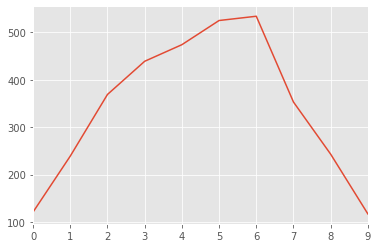

In [1337]:
pd.DataFrame(rfc.predict_proba(X_test))[pd.DataFrame(rfc.predict_proba(X_test)) > .7].count().plot()

Categories 5 & 6 seem to have the highest certainty to the category assignment.

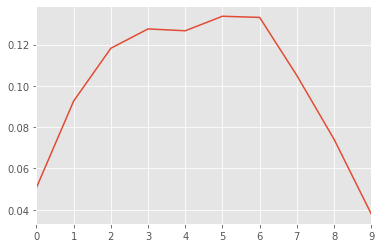

In [1321]:
pd.DataFrame(rfc.predict_proba(X_test)).mean().plot()

The categories on either extreme have the lowest mean probabilities.

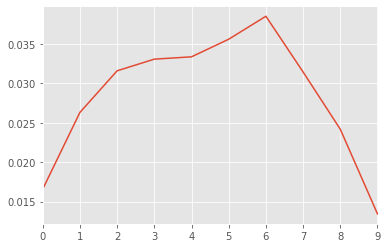

In [1329]:
pd.DataFrame(rfc.predict_proba(X_test)).var().plot()

In [1355]:
# np.nonzero(rfc.predict_proba(X_test)[rfc.predict_proba(X_test) > .7])[0]

In [1341]:
(pd.DataFrame(rfc.predict_proba(X_test)) > .7)

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
22766,False,False,False,False,False,False,False,False,False,False
22767,False,False,False,False,False,False,False,False,False,False
22768,False,False,False,False,False,False,False,False,False,False
22769,False,False,False,False,False,False,False,False,False,False


In [835]:
pd.DataFrame(y_score)

,0,1,2,3,4,5,6,7,8,9
0,0.000000,0.700000,0.0,0.10,0.033333,0.1,0.075000,0.000000,0.000000,0.000000
1,0.120130,0.000000,0.0,0.00,0.000000,0.0,0.158889,0.359916,0.138095,0.085877
2,0.335476,0.000000,0.0,0.00,0.000000,0.0,0.000000,0.186667,0.000000,0.308571
3,0.611667,0.000000,0.0,0.00,0.000000,0.0,0.020000,0.000000,0.000000,0.311190
4,0.000000,0.000000,0.0,0.00,0.000000,1.0,0.200000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
22766,0.000000,0.300000,0.0,0.30,0.100000,0.3,0.200000,0.000000,0.000000,0.000000
22767,0.000000,0.000000,0.0,0.00,0.000000,0.0,0.630000,0.363333,0.011111,0.000000
22768,0.200000,0.111111,0.0,0.10,0.100000,0.3,0.000000,0.000000,0.050000,0.000000
22769,0.100000,0.350000,0.0,0.30,0.000000,0.3,0.200000,0.000000,0.000000,0.000000


In [846]:
# https://stackoverflow.com/questions/54923349/top-3-values-per-row-in-pandas

c = ['Level_1','Level_2','Level_3']
salary_priority = (pd.DataFrame(y_score)
        .apply(lambda x: pd.Series(x.nlargest(3).index, index=c), axis=1))

In [850]:
salary_priority

,Level_1,Level_2,Level_3
0,1,3,5
1,7,6,8
2,0,9,7
3,0,9,6
4,5,6,0
...,...,...,...
22766,1,3,5
22767,6,7,8
22768,5,0,1
22769,1,3,5


In [859]:
# import dict with mean salary for each category
category_mean_salary = pd.read_csv('02.data/category_mean_salary.csv', squeeze=True).to_dict()

In [861]:
# examine dictionary to make sure it looks as it should
category_mean_salary

{0: 59647.82571283955,
 1: 72767.65966069745,
 2: 86460.6052983081,
 3: 103119.30204572805,
 4: 124540.44896978023,
 5: 153813.4601387616,
 6: 190927.3190163268,
 7: 247070.26287262872,
 8: 347122.87960510474,
 9: 589441.8432925366}

In [890]:
salary_priority.replace(category_mean_salary)

,Level_1,Level_2,Level_3
0,72767.659661,103119.302046,153813.460139
1,247070.262873,190927.319016,347122.879605
2,59647.825713,589441.843293,247070.262873
3,59647.825713,589441.843293,190927.319016
4,153813.460139,190927.319016,59647.825713
...,...,...,...
22766,72767.659661,103119.302046,153813.460139
22767,190927.319016,247070.262873,347122.879605
22768,153813.460139,59647.825713,72767.659661
22769,72767.659661,103119.302046,153813.460139


In [889]:
salary_priority.replace(category_mean_salary).mean(axis=1)

# , inplace=True

0        109900.140615
1        261706.820498
2        298719.977293
3        280005.662674
4        134796.201623
             ...      
22766    109900.140615
22767    261706.820498
22768     95409.648504
22769    109900.140615
22770    136612.463544
Length: 22771, dtype: float64

#### Rather than the above, include all probabilities and multiply each by the mean salary for that category.

In [894]:
# multipy each column probability by 
# the mean value for that salary category
frac_salary = pd.DataFrame(y_score)

for column in frac_salary.columns:
    frac_salary[column] = frac_salary[column] * category_mean_salary[column]

In [900]:
# examine results
# they appear to be less affected by extremes in classification

frac_salary.sum(axis=1)

0         95101.535206
1        224981.539447
2        248015.119388
3        223731.821009
4        191998.923942
             ...      
22766    149549.635254
22767    213909.994042
22768    106281.017784
22769    146698.755911
22770    211870.537033
Length: 22771, dtype: float64

### Examine precision/recall thresholds
https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html

Precision = true positive/(true positive + false positive)

Recall = true positive/(true positive + false negative)

In [1290]:
# Use label_binarize to be multi-label like settings
Y = label_binarize(y, classes=y.unique())
n_classes = Y.shape[1]

In [1239]:
Y.shape

(113851, 10)

In [1291]:
# Split into training and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2)

In [1251]:
# Run classifier
classifier = OneVsRestClassifier(rfc)
classifier.fit(X_train, Y_train)
y_score = classifier.predict_proba(X_test)

In [1292]:
rfc.fit(X_train, Y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_score = rfc.predict_proba(X_test)

In [1252]:
pd.DataFrame(y_score).head(10)

,0,1,2,3,4,5,6,7,8,9
0,0.131566,0.000000,0.0,0.117415,0.000000,0.000000,0.000000,0.000000,0.075397,0.64131
1,0.033333,0.000000,0.0,0.000000,0.000000,0.100000,0.060000,0.183333,0.800000,0.00000
2,0.000000,0.000000,0.0,0.000000,0.345000,0.684167,0.000000,0.000000,0.000000,0.00000
3,0.000000,0.481071,0.0,0.000000,0.220635,0.259524,0.000000,0.000000,0.000000,0.00000
4,0.050000,0.000000,0.0,0.000000,0.000000,0.100000,0.027273,0.375000,0.000000,0.20000
5,0.000000,0.000000,0.0,0.800000,0.000000,0.100000,0.041667,0.000000,0.000000,0.10000
6,0.300000,0.000000,0.3,0.350000,0.100000,0.100000,0.100000,0.000000,0.000000,0.00000
7,0.100000,0.171667,0.0,0.300000,0.200000,0.200000,0.180000,0.025000,0.000000,0.00000
8,0.458333,0.000000,0.0,0.300000,0.000000,0.000000,0.000000,0.057143,0.000000,0.00000
9,0.375000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.440000,0.000000,0.00000


In [1260]:
pd.DataFrame(classifier.predict(X_test)).head(20)

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0


Predict seems to not be making any prediction if the threshold is less than 50%.

In [1253]:
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(Y_test[:, i],
                                                        y_score[:, i])
    average_precision[i] = average_precision_score(Y_test[:, i], y_score[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(Y_test.ravel(),
    y_score.ravel())
average_precision["micro"] = average_precision_score(Y_test, y_score,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.18


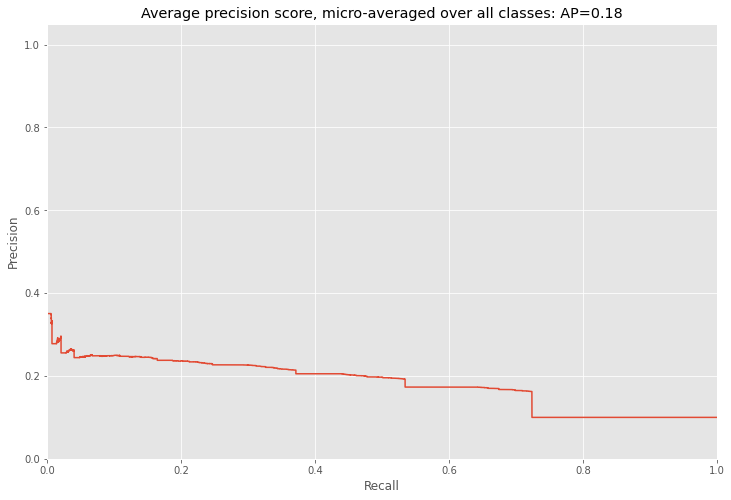

In [1254]:
plt.figure(figsize=(12, 8))
plt.step(recall['micro'], precision['micro'], where='post')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]));

Clearly, most of the predicted labels are incorrect when compared to the training labels

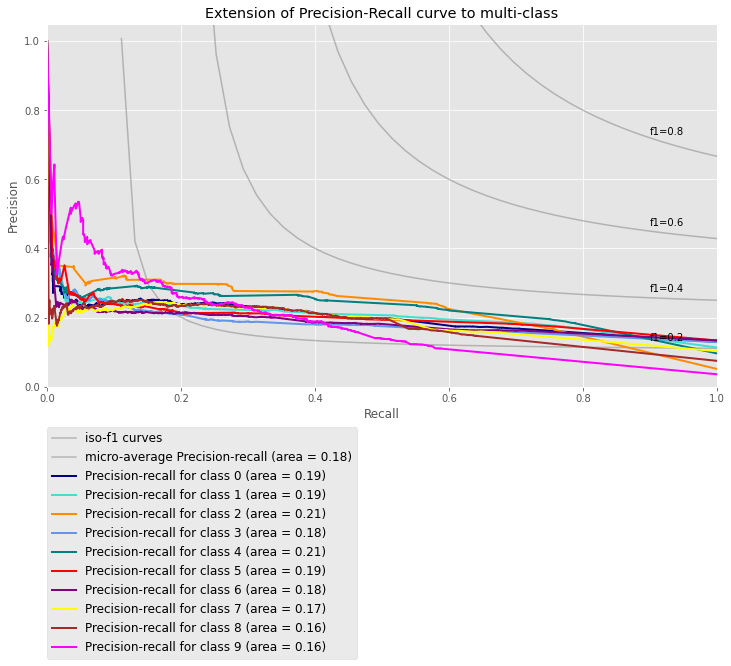

In [1255]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 
                'turquoise', 
                'darkorange', 
                'cornflowerblue', 
                'teal',
                'red',
               'purple',
               'yellow',
               'brown',
               'magenta',
               'green'])

plt.figure(figsize=(12, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.5)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
# l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.75), prop=dict(size=12))

plt.show();

### Examine ROC curve thresholds 

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

True Positive Rate(Recall) = true positive/(true positive + false negative)

False Positive Rate = false positive/(false positive + true positive)

In [1256]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(Y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

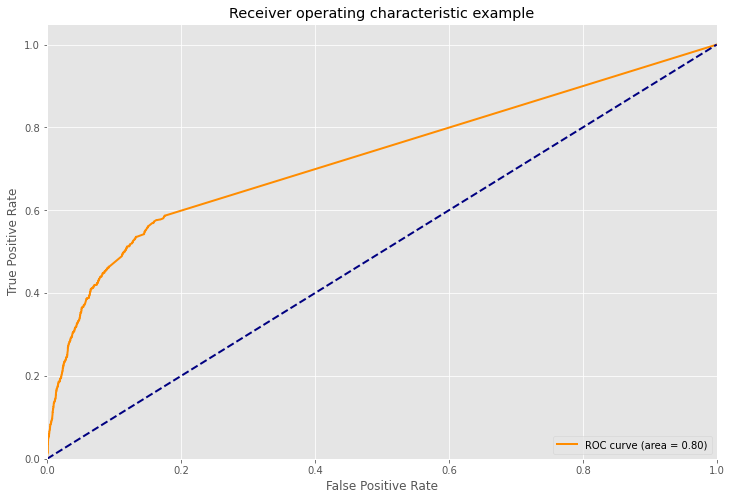

In [1257]:
# plot ROC curve for specific classes
plt.figure(figsize=(12, 8))
lw = 2
plt.plot(fpr[9], tpr[9], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

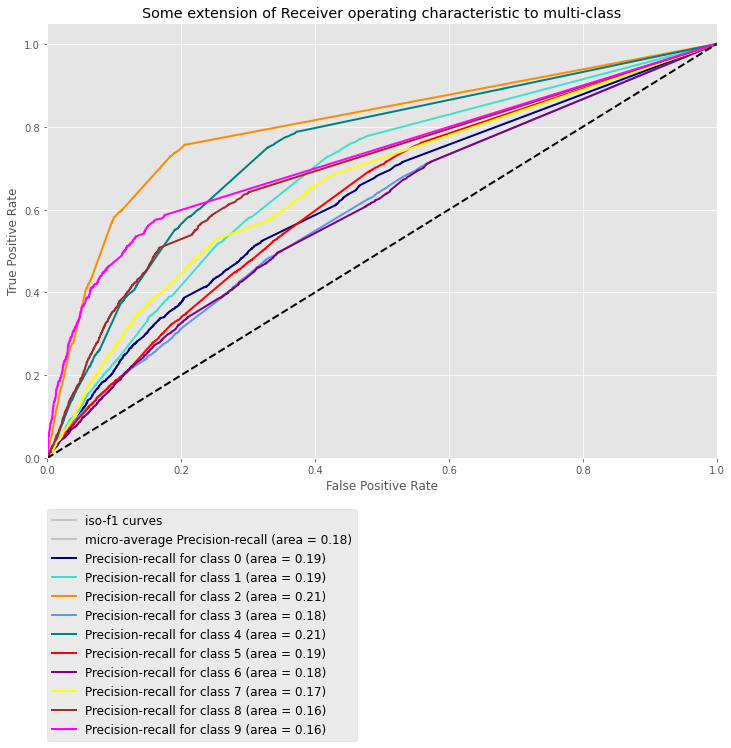

In [1258]:
# plot all classes together
lw = 2

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

plt.figure(figsize=(12, 8))

colors = cycle(['navy', 
                'turquoise', 
                'darkorange', 
                'cornflowerblue', 
                'teal',
                'red',
               'purple',
               'yellow',
               'brown',
               'magenta',
               'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(lines, labels, loc=(0, -.65), prop=dict(size=12))
plt.show()

### Salary Priority Levels
Because my classifier performance isn't great, I could provide a salary average of the top three salary categories.


### Spare parts

In [791]:
# actual_labels.columns = actual_labels.columns.astype(str) + '_'

In [844]:
# per_with_labels = pd.concat([pd.DataFrame(y_score),
#            actual_labels], axis=1)

### Random Forest Classifier 2nd Iteration - selecting only the top features

In [691]:
X_train, X_test, y_train, y_test = train_test_split(X[f_importances[f_importances > .05].index]
                                                    , y, test_size = 0.2)

In [692]:
rfc = ensemble.RandomForestClassifier()

# cross_val_score(rfc, X, y, cv=5)

In [693]:
rfc.fit(X_train, y_train)

C:\Users\mrkjh\Miniconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [694]:
rfc.score(X_test, y_test)

0.2410522155373062

In [695]:
X_test['pred'] = rfc.predict(X_test)
X_test['actual'] = y_test

In [865]:
# create confusion matrix and
# normalize the matrix to more accurately 
# compare which predictions the model is getting wrong
norm_conf_matrix = confusion_matrix(X_test.actual, X_test.pred) / \
confusion_matrix(X_test.actual, X_test.pred).sum(axis=1, keepdims=True)

AttributeError: 'DataFrame' object has no attribute 'actual'

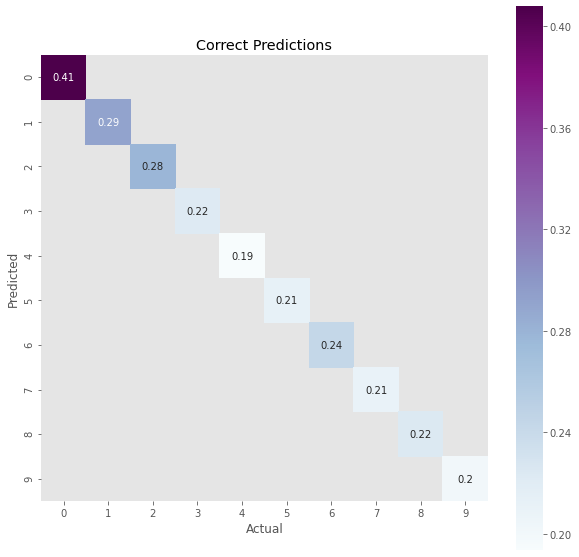

In [697]:
# display only the diagonal values
# representing values the model correctly predicted
plt.figure(figsize=(10, 10))

sns.heatmap(pd.DataFrame(np.diagflat(np.diagonal(pd.DataFrame(norm_conf_matrix)))).replace(0, np.nan),
            cmap='BuPu',
            annot=True,
            square=True,
            );
plt.ylabel('Predicted')
plt.xlabel('Actual')
plt.title('Correct Predictions');

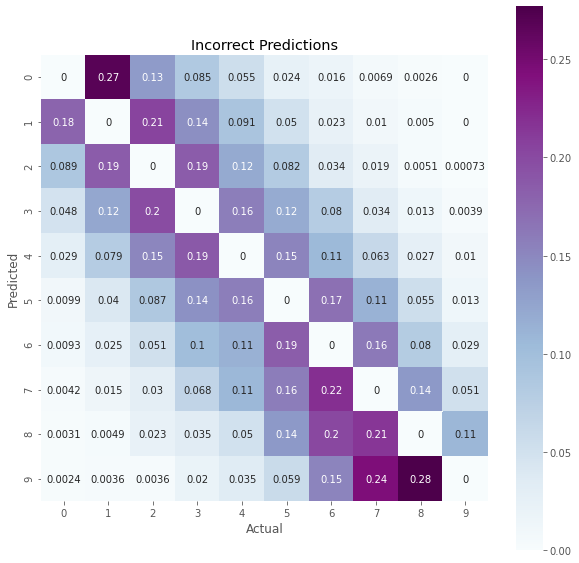

In [711]:
# compare features using a heatmap
plt.figure(figsize=(10, 10))
np.fill_diagonal(norm_conf_matrix, 0)

ax = sns.heatmap(norm_conf_matrix, 
                 square=True, annot=True, 
                 cmap='BuPu')

plt.ylabel('Predicted')
plt.xlabel('Actual');
plt.title('Incorrect Predictions');

In [699]:
f_importances = pd.Series(rfc.feature_importances_, 
          X_train.columns).sort_values(ascending=False)

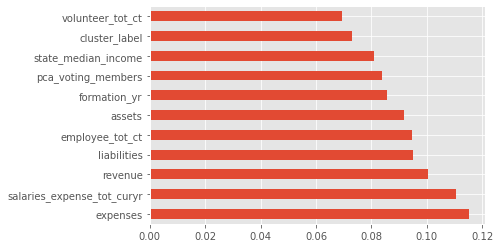

In [700]:
f_importances.plot(kind='barh');

Reducing features had limited impact on my model performance.